In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 


{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [2]:
# 1. CARGA DEL DATASET

covertype = fetch_ucirepo(id=31)  # Dataset: Forest CoverType
df = covertype.data.original

In [14]:
print("\n ESTRUCTURA DEL DATASET")

print(f"• Nombre: {covertype.metadata['name']}")
print(f"• Área: {covertype.metadata['area']}")
print(f"• Características: {covertype.metadata['num_features']}")
print(f"• Instancias: {covertype.metadata['num_instances']:,}")

# Accede de forma segura a la variable objetivo
target = covertype.metadata.get('target', 'Cover_Type')
print(f"• Variable objetivo: {target}")

# Clasificación de variables
continuous_vars = ['Elevation', 'Aspect', 'Slope', 
                   'Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology', 
                   'Horizontal_Distance_To_Roadways',
                   'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                   'Horizontal_Distance_To_Fire_Points']

wilderness_vars = [f'Wilderness_Area{i}' for i in range(1, 5)]
soil_vars = [f'Soil_Type{i}' for i in range(1, 41)]

print(f"\n CLASIFICACIÓN DE VARIABLES:")
print(f"• Variables continuas: {len(continuous_vars)}")
print(f"• Variables de área silvestre: {len(wilderness_vars)}")
print(f"• Variables de tipo de suelo: {len(soil_vars)}")
print(f"• Variable objetivo: {target}")



 ESTRUCTURA DEL DATASET
• Nombre: Covertype
• Área: Biology
• Características: 54
• Instancias: 581,012
• Variable objetivo: Cover_Type

 CLASIFICACIÓN DE VARIABLES:
• Variables continuas: 10
• Variables de área silvestre: 4
• Variables de tipo de suelo: 40
• Variable objetivo: Cover_Type


In [15]:
print("\n ANÁLISIS DE CALIDAD DE DATOS")
import pandas as pd
import numpy as np
# Información básica
print("\n TIPOS DE DATOS Y MEMORIA:")
print(df.info())

# Verificación de valores nulos
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores_Faltantes': missing_data,
    'Porcentaje': missing_percent
}).sort_values('Valores_Faltantes', ascending=False)

missing_info = missing_info[missing_info['Valores_Faltantes'] > 0]
if len(missing_info) > 0:
    print("\n  VALORES FALTANTES DETECTADOS:")
    print(missing_info)
else:
    print(" No hay valores faltantes en el dataset")

# Verificación de duplicados
duplicates = df.duplicated().sum()
print(f"\n REGISTROS DUPLICADOS: {duplicates}")


 ANÁLISIS DE CALIDAD DE DATOS

 TIPOS DE DATOS Y MEMORIA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int6


 ANÁLISIS DE LA VARIABLE OBJETIVO: Cover_Type


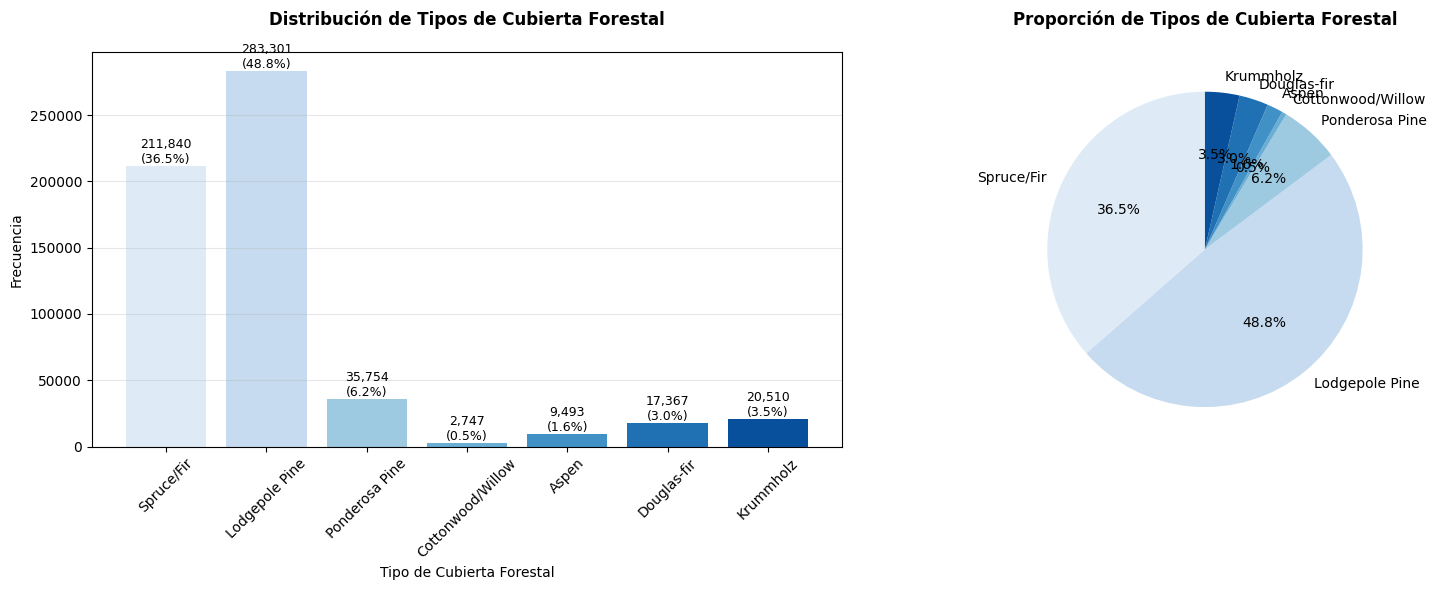


 ESTADÍSTICAS DE LA VARIABLE OBJETIVO:
 Código     Tipo_Cubierta  Frecuencia  Porcentaje
      1        Spruce/Fir      211840   36.460521
      2    Lodgepole Pine      283301   48.759922
      3    Ponderosa Pine       35754    6.153746
      4 Cottonwood/Willow        2747    0.472796
      5             Aspen        9493    1.633873
      6       Douglas-fir       17367    2.989095
      7         Krummholz       20510    3.530048

  ANÁLISIS DE BALANCE:
• Ratio de desbalance: 103.13:1
• Clase mayoritaria: Lodgepole Pine (283,301)
• Clase minoritaria: Cottonwood/Willow (2,747)


In [16]:
# 4. ANÁLISIS DE LA VARIABLE OBJETIVO
import matplotlib.pyplot as plt
import seaborn as sns

print("\n ANÁLISIS DE LA VARIABLE OBJETIVO: Cover_Type")

# Paleta de colores azul
PALETTE = sns.color_palette("Blues", n_colors=7)

# Distribución de clases
class_distribution = df['Cover_Type'].value_counts().sort_index()
class_percentages = (class_distribution / len(df)) * 100

# Descripción de las clases
class_descriptions = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine', 
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir', 
    7: 'Krummholz'
}

# Crear figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#  Gráfico de barras
bars = ax1.bar(
    [class_descriptions[i] for i in class_distribution.index], 
    class_distribution.values, 
    color=PALETTE
)
ax1.set_title('Distribución de Tipos de Cubierta Forestal', fontweight='bold', pad=20)
ax1.set_xlabel('Tipo de Cubierta Forestal')
ax1.set_ylabel('Frecuencia')
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Etiquetas sobre barras
for bar, count, percentage in zip(bars, class_distribution.values, class_percentages):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2., height + 100,
             f'{count:,}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=9)

#  Gráfico de pie
wedges, texts, autotexts = ax2.pie(
    class_distribution.values,
    labels=[class_descriptions[i] for i in class_distribution.index],
    autopct='%1.1f%%',
    colors=PALETTE,
    startangle=90
)
ax2.set_title('Proporción de Tipos de Cubierta Forestal', fontweight='bold', pad=20)

# Mostrar
plt.tight_layout()
plt.show()

#  Estadísticas detalladas
print("\n ESTADÍSTICAS DE LA VARIABLE OBJETIVO:")
target_stats = pd.DataFrame({
    'Código': class_distribution.index,
    'Tipo_Cubierta': [class_descriptions[i] for i in class_distribution.index],
    'Frecuencia': class_distribution.values,
    'Porcentaje': class_percentages.values
})
print(target_stats.to_string(index=False))

#  Análisis de balance
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"\n  ANÁLISIS DE BALANCE:")
print(f"• Ratio de desbalance: {imbalance_ratio:.2f}:1")
print(f"• Clase mayoritaria: {class_descriptions[class_distribution.idxmax()]} ({class_distribution.max():,})")
print(f"• Clase minoritaria: {class_descriptions[class_distribution.idxmin()]} ({class_distribution.min():,})")



 ANÁLISIS UNIVARIANTE - VARIABLES CONTINUAS

 ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:
                                       count      mean       std     min  \
Elevation                           581012.0  2959.365   279.985  1859.0   
Aspect                              581012.0   155.657   111.914     0.0   
Slope                               581012.0    14.104     7.488     0.0   
Horizontal_Distance_To_Hydrology    581012.0   269.428   212.549     0.0   
Vertical_Distance_To_Hydrology      581012.0    46.419    58.295  -173.0   
Horizontal_Distance_To_Roadways     581012.0  2350.147  1559.255     0.0   
Hillshade_9am                       581012.0   212.146    26.770     0.0   
Hillshade_Noon                      581012.0   223.319    19.769     0.0   
Hillshade_3pm                       581012.0   142.528    38.275     0.0   
Horizontal_Distance_To_Fire_Points  581012.0  1980.291  1324.195     0.0   

                                       25%     50%     75%     max     IQR  \


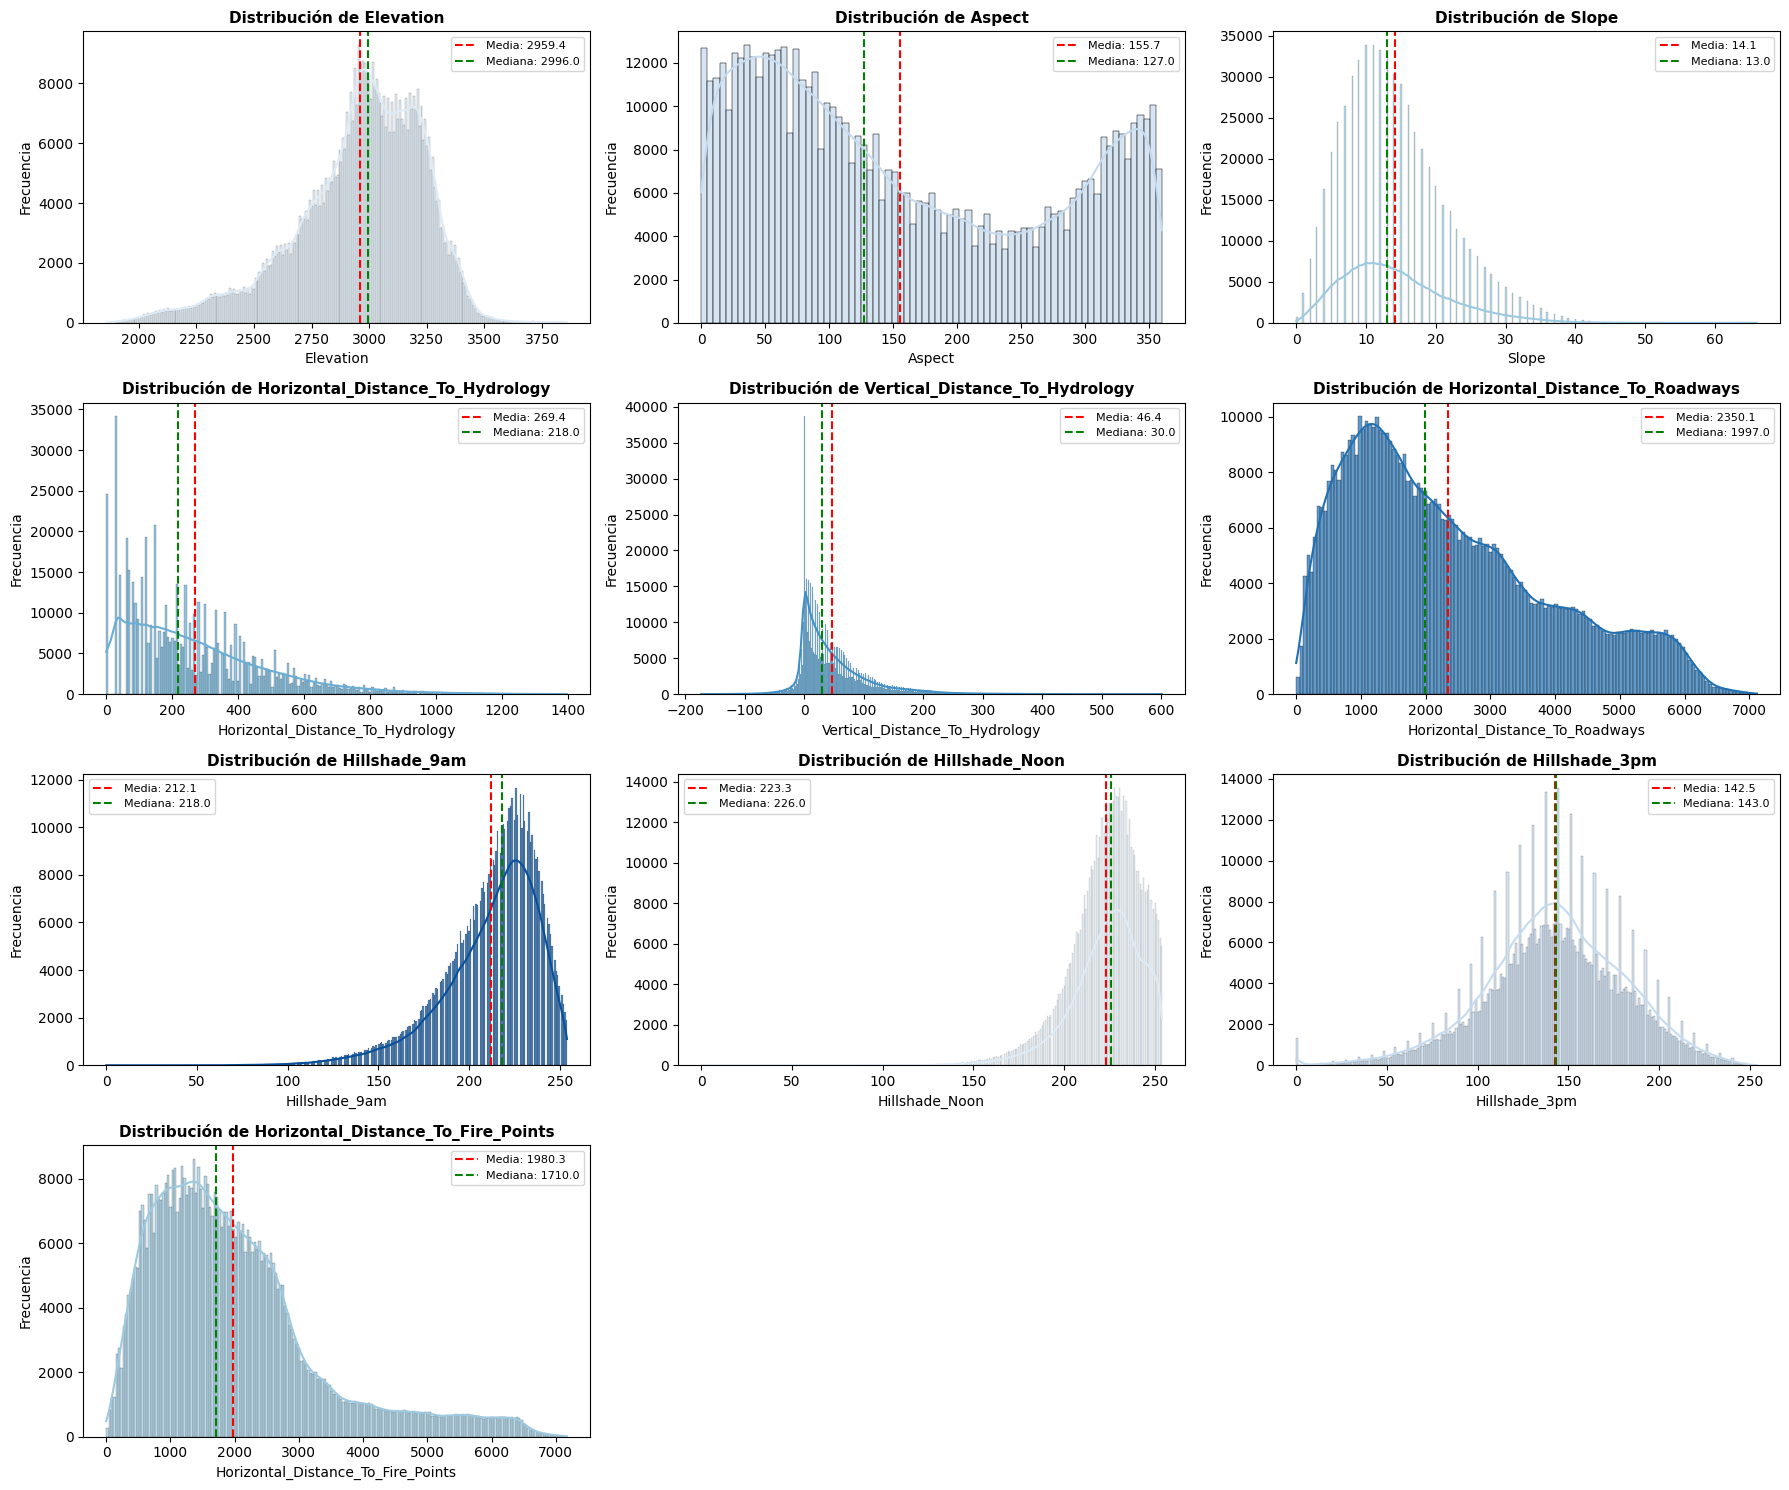

In [17]:
# 5. ANÁLISIS UNIVARIANTE - VARIABLES CONTINUAS
import matplotlib.pyplot as plt
print("\n ANÁLISIS UNIVARIANTE - VARIABLES CONTINUAS")

# Estadísticas descriptivas
print("\n ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:")
numeric_stats = df[continuous_vars].describe().T
numeric_stats['IQR'] = numeric_stats['75%'] - numeric_stats['25%']
numeric_stats['Coef_Variacion'] = (numeric_stats['std'] / numeric_stats['mean']) * 100
numeric_stats['Skewness'] = df[continuous_vars].skew()
numeric_stats['Kurtosis'] = df[continuous_vars].kurtosis()
numeric_stats['CV_Categoria'] = np.where(numeric_stats['Coef_Variacion'] > 50, 'Alta', 
                                       np.where(numeric_stats['Coef_Variacion'] > 20, 'Media', 'Baja'))

print(numeric_stats.round(3))

# Visualización de distribuciones
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    if i < len(axes):
        # Histograma con curva de densidad
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color=PALETTE[i % len(PALETTE)], alpha=0.7)
        axes[i].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        
        # Líneas de media y mediana
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, 
                       label=f'Media: {mean_val:.1f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=1.5, 
                       label=f'Mediana: {median_val:.1f}')
        axes[i].legend(fontsize=8)

# Ocultar ejes no utilizados
for i in range(len(continuous_vars), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


 ANÁLISIS DE VARIABLES BINARIAS

 DISTRIBUCIÓN DE ÁREAS SILVESTRES:
 Wilderness_Area  Frecuencia  Porcentaje
Wilderness_Area1      260796       44.89
Wilderness_Area3      253364       43.61
Wilderness_Area4       36968        6.36
Wilderness_Area2       29884        5.14

  ANÁLISIS DE TIPOS DE SUELO (40 variables):
• Tipos de suelo presentes: 40
• Tipos de suelo ausentes: 0

 TOP 10 TIPOS DE SUELO MÁS COMUNES:
  Soil_Type  Frecuencia  Porcentaje
Soil_Type29      115247       19.84
Soil_Type23       57752        9.94
Soil_Type32       52519        9.04
Soil_Type33       45154        7.77
Soil_Type22       33373        5.74
Soil_Type10       32634        5.62
Soil_Type30       30170        5.19
Soil_Type12       29971        5.16
Soil_Type31       25666        4.42
Soil_Type24       21278        3.66


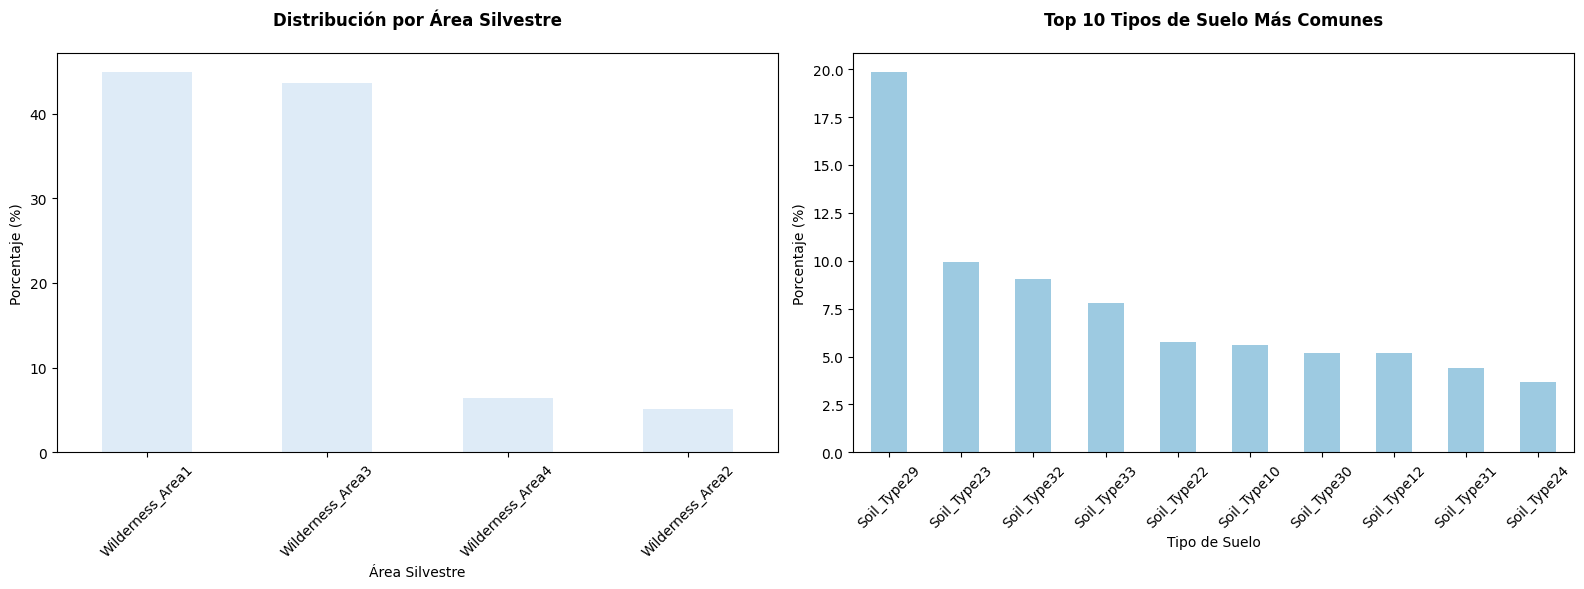

In [18]:
# 6. ANÁLISIS DE VARIABLES BINARIAS


print("\n ANÁLISIS DE VARIABLES BINARIAS")


# Análisis de áreas silvestres
print("\n DISTRIBUCIÓN DE ÁREAS SILVESTRES:")
wilderness_frequencies = {}
for col in wilderness_vars:
    if col in df.columns:
        wilderness_frequencies[col] = df[col].sum()

wilderness_freq_df = pd.DataFrame({
    'Wilderness_Area': wilderness_frequencies.keys(),
    'Frecuencia': wilderness_frequencies.values(),
    'Porcentaje': (np.array(list(wilderness_frequencies.values())) / len(df)) * 100
}).sort_values('Frecuencia', ascending=False)

print(wilderness_freq_df.round(2).to_string(index=False))

# Análisis de tipos de suelo
print(f"\n  ANÁLISIS DE TIPOS DE SUELO ({len(soil_vars)} variables):")
soil_frequencies = {}
for col in soil_vars:
    if col in df.columns and df[col].sum() > 0:
        soil_frequencies[col] = df[col].sum()

soil_freq_df = pd.DataFrame({
    'Soil_Type': soil_frequencies.keys(),
    'Frecuencia': soil_frequencies.values(),
    'Porcentaje': (np.array(list(soil_frequencies.values())) / len(df)) * 100
}).sort_values('Frecuencia', ascending=False)

print(f"• Tipos de suelo presentes: {len(soil_frequencies)}")
print(f"• Tipos de suelo ausentes: {len(soil_vars) - len(soil_frequencies)}")

print("\n TOP 10 TIPOS DE SUELO MÁS COMUNES:")
print(soil_freq_df.head(10).round(2).to_string(index=False))

# Visualización de distribuciones binarias
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Áreas silvestres
wilderness_freq_df.plot(kind='bar', x='Wilderness_Area', y='Porcentaje', 
                       ax=ax1, legend=False, color=PALETTE[0])
ax1.set_title('Distribución por Área Silvestre', fontweight='bold', pad=20)
ax1.set_ylabel('Porcentaje (%)')
ax1.set_xlabel('Área Silvestre')
ax1.tick_params(axis='x', rotation=45)

# Tipos de suelo (top 10)
soil_freq_df.head(10).plot(kind='bar', x='Soil_Type', y='Porcentaje', 
                          ax=ax2, legend=False, color=PALETTE[2])
ax2.set_title('Top 10 Tipos de Suelo Más Comunes', fontweight='bold', pad=20)
ax2.set_ylabel('Porcentaje (%)')
ax2.set_xlabel('Tipo de Suelo')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


 ANÁLISIS BIVARIANTE - VARIABLES vs TARGET


C:\Users\Coder\AppData\Local\Temp\ipykernel_19056\568553984.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=df, x='Cover_Type', y=var, ax=axes[i], palette=PALETTE)
C:\Users\Coder\AppData\Local\Temp\ipykernel_19056\568553984.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([class_descriptions[i] for i in range(1, 8)], rotation=45)
C:\Users\Coder\AppData\Local\Temp\ipykernel_19056\568553984.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=df, x='Cover_Type', y=var, ax=axes[i], palette=PALETTE)
C:\Users\Coder\AppData\Local\Temp\ipykernel_19056\

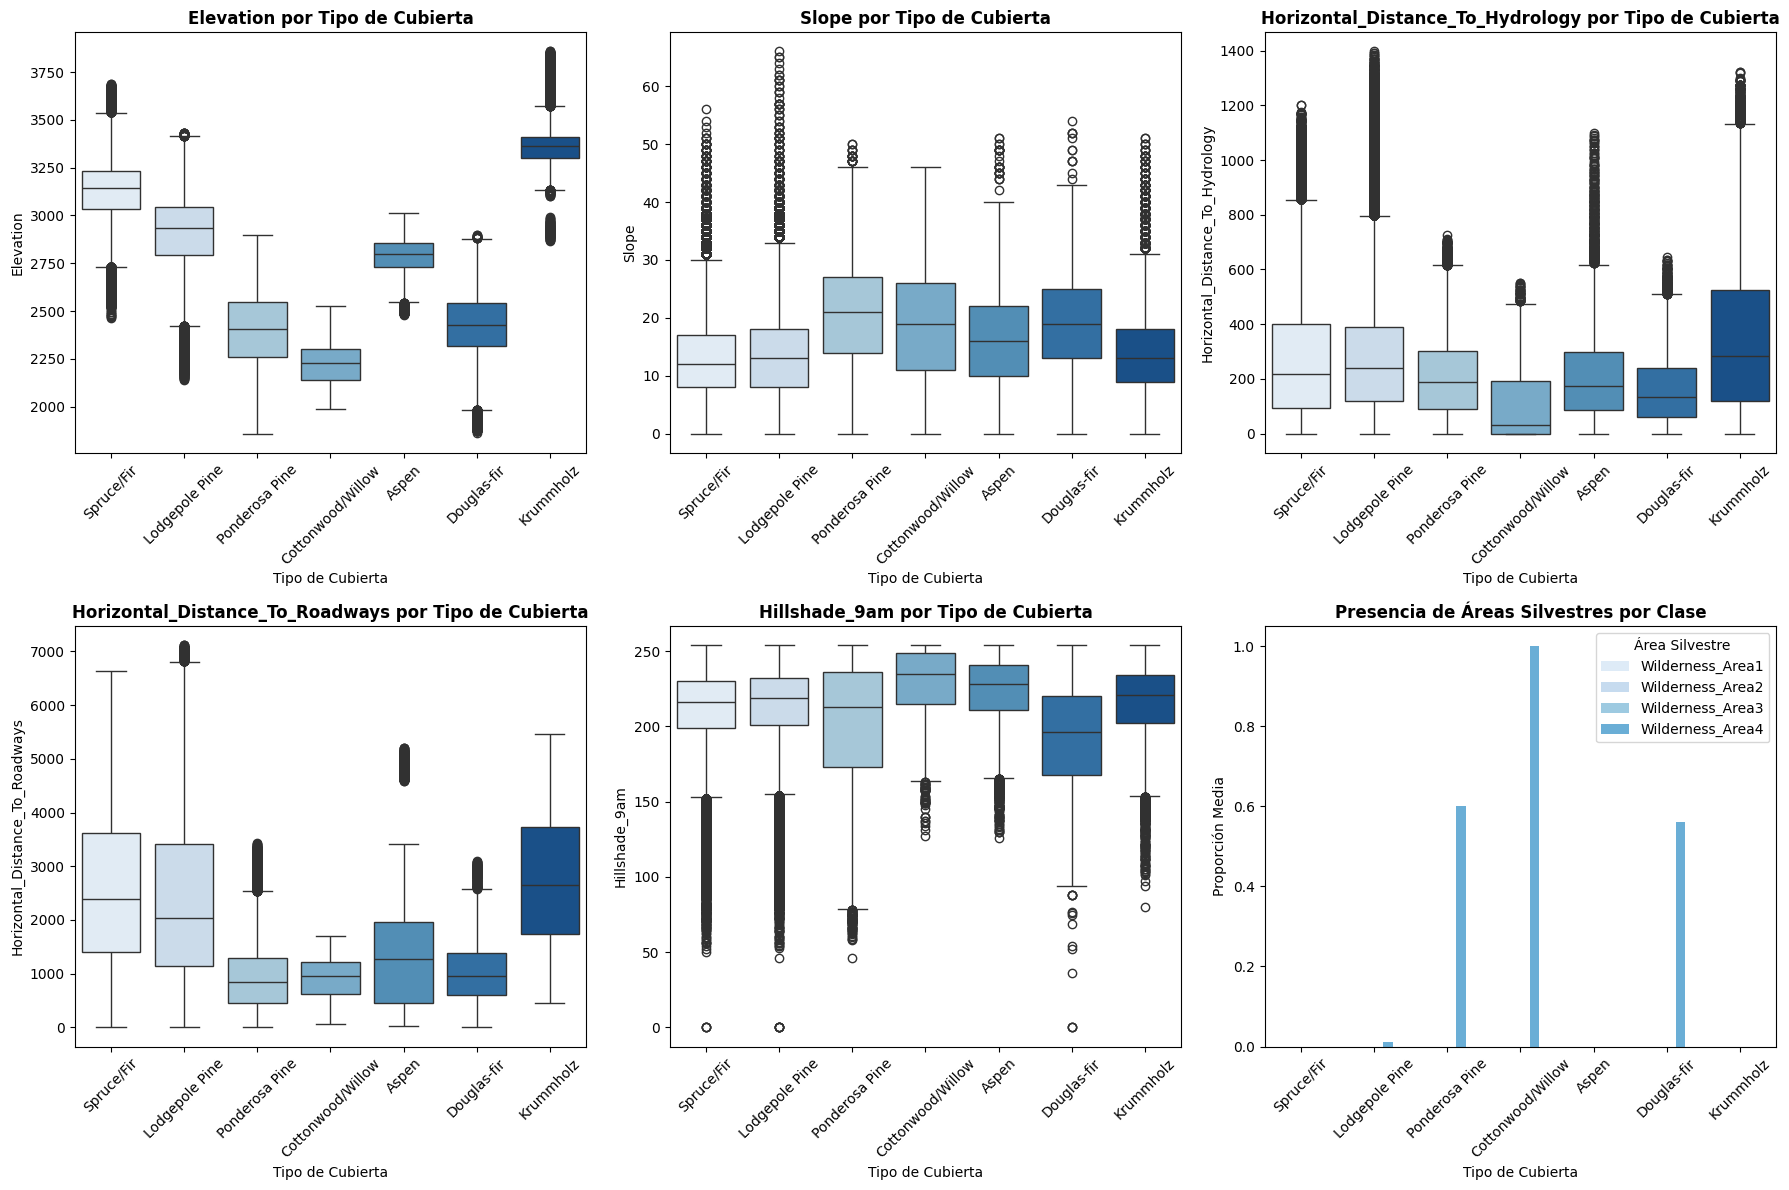

In [19]:
# 7. ANÁLISIS BIVARIANTE - RELACIÓN CON TARGET

print("\n ANÁLISIS BIVARIANTE - VARIABLES vs TARGET")


# Variables clave para análisis bivariante
key_continuous_vars = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                      'Horizontal_Distance_To_Roadways', 'Hillshade_9am']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(key_continuous_vars):
    # Boxplot por clase
    boxplot = sns.boxplot(data=df, x='Cover_Type', y=var, ax=axes[i], palette=PALETTE)
    axes[i].set_title(f'{var} por Tipo de Cubierta', fontweight='bold')
    axes[i].set_xlabel('Tipo de Cubierta')
    axes[i].set_ylabel(var)
    axes[i].set_xticklabels([class_descriptions[i] for i in range(1, 8)], rotation=45)

# Análisis de wilderness areas por clase
wilderness_by_class = pd.DataFrame()
for wilderness in wilderness_vars:
    if wilderness in df.columns:
        temp = df.groupby('Cover_Type')[wilderness].mean().reset_index()
        temp['Wilderness_Area'] = wilderness
        wilderness_by_class = pd.concat([wilderness_by_class, temp])

wilderness_pivot = wilderness_by_class.pivot(index='Cover_Type', columns='Wilderness_Area', values=wilderness)
wilderness_pivot.plot(kind='bar', ax=axes[5], color=PALETTE[:4])
axes[5].set_title('Presencia de Áreas Silvestres por Clase', fontweight='bold')
axes[5].set_xlabel('Tipo de Cubierta')
axes[5].set_ylabel('Proporción Media')
axes[5].set_xticklabels([class_descriptions[i] for i in range(1, 8)], rotation=45)
axes[5].legend(title='Área Silvestre')

plt.tight_layout()
plt.show()


 ANÁLISIS DE CORRELACIONES


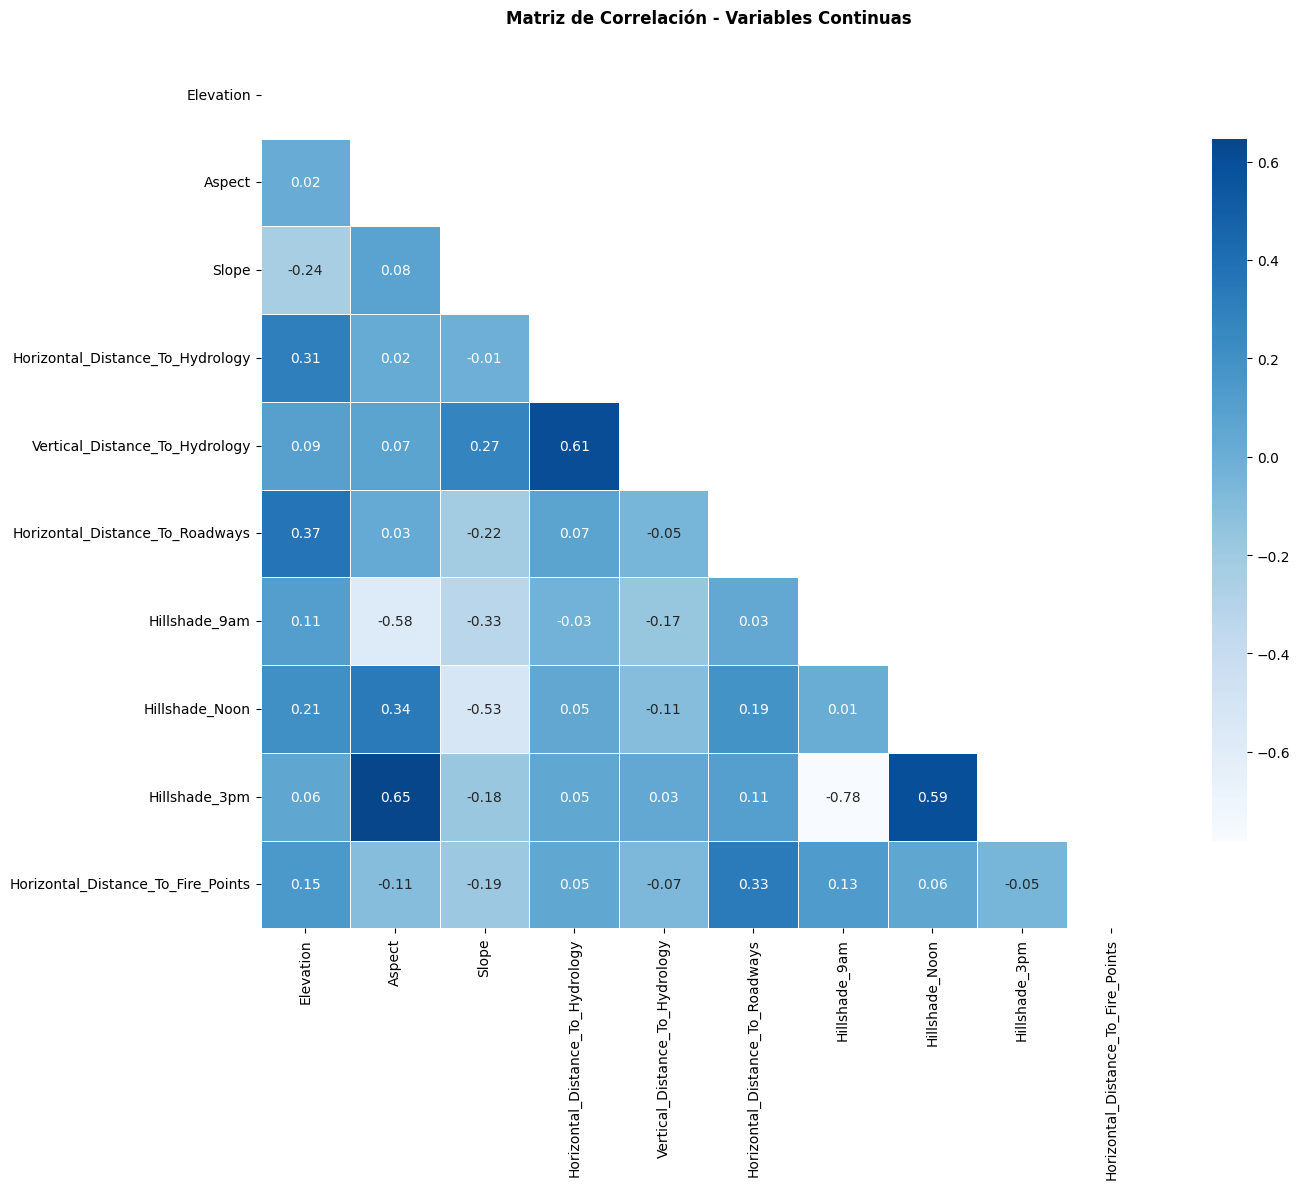


 CORRELACIONES CON TARGET (absolutas):
                             Variable  Correlación_Abs
0                           Elevation            0.270
5     Horizontal_Distance_To_Roadways            0.153
2                               Slope            0.148
9  Horizontal_Distance_To_Fire_Points            0.109
7                      Hillshade_Noon            0.096
4      Vertical_Distance_To_Hydrology            0.082
8                       Hillshade_3pm            0.048
6                       Hillshade_9am            0.035
3    Horizontal_Distance_To_Hydrology            0.020
1                              Aspect            0.017

 CORRELACIONES FUERTES ENTRE VARIABLES (|r| > 0.5):
                       Variable1                          Variable2  Correlación
                       Elevation                              Slope       -0.243
                       Elevation   Horizontal_Distance_To_Hydrology        0.306
                       Elevation    Horizontal_Distance_To_

In [25]:
# 8. ANÁLISIS DE CORRELACIONES


print("\n ANÁLISIS DE CORRELACIONES")

# Matriz de correlación para variables continuas
correlation_matrix = df[continuous_vars].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Blues', 
            center=0, fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Variables Continuas', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("\n CORRELACIONES CON TARGET (absolutas):")
target_correlations = {}
for col in continuous_vars:
    corr = np.corrcoef(df[col], df['Cover_Type'])[0, 1]
    target_correlations[col] = abs(corr)

target_corr_df = pd.DataFrame({
    'Variable': target_correlations.keys(),
    'Correlación_Abs': target_correlations.values()
}).sort_values('Correlación_Abs', ascending=False)

print(target_corr_df.round(3))

# Identificar correlaciones fuertes entre variables
print("\n CORRELACIONES FUERTES ENTRE VARIABLES (|r| > 0.5):")
strong_correlations = []
for i, col1 in enumerate(continuous_vars):
    for j, col2 in enumerate(continuous_vars):
        if i < j:  # Evitar duplicados
            corr = correlation_matrix.loc[col1, col2]
            if abs(corr) > 0.1:
                strong_correlations.append((col1, col2, corr))

strong_corr_df = pd.DataFrame(strong_correlations, 
                             columns=['Variable1', 'Variable2', 'Correlación'])
print(strong_corr_df.round(3).to_string(index=False))


 DETECCIÓN DE OUTLIERS
                          Variable  Outliers Porcentaje Límite_Inferior Límite_Superior
                         Elevation     15569      2.68%          2278.0          3694.0
                            Aspect         0      0.00%          -245.0           563.0
                             Slope     15316      2.64%            -4.5            31.5
  Horizontal_Distance_To_Hydrology     14557      2.51%          -306.0           798.0
    Vertical_Distance_To_Hydrology     31463      5.42%           -86.0           162.0
   Horizontal_Distance_To_Roadways       669      0.12%         -2227.0          6661.0
                     Hillshade_9am     17433      3.00%           148.5           280.5
                    Hillshade_Noon     15672      2.70%           177.0           273.0
                     Hillshade_3pm      7832      1.35%            45.5           241.5
Horizontal_Distance_To_Fire_Points     31157      5.36%         -1265.0          4839.0


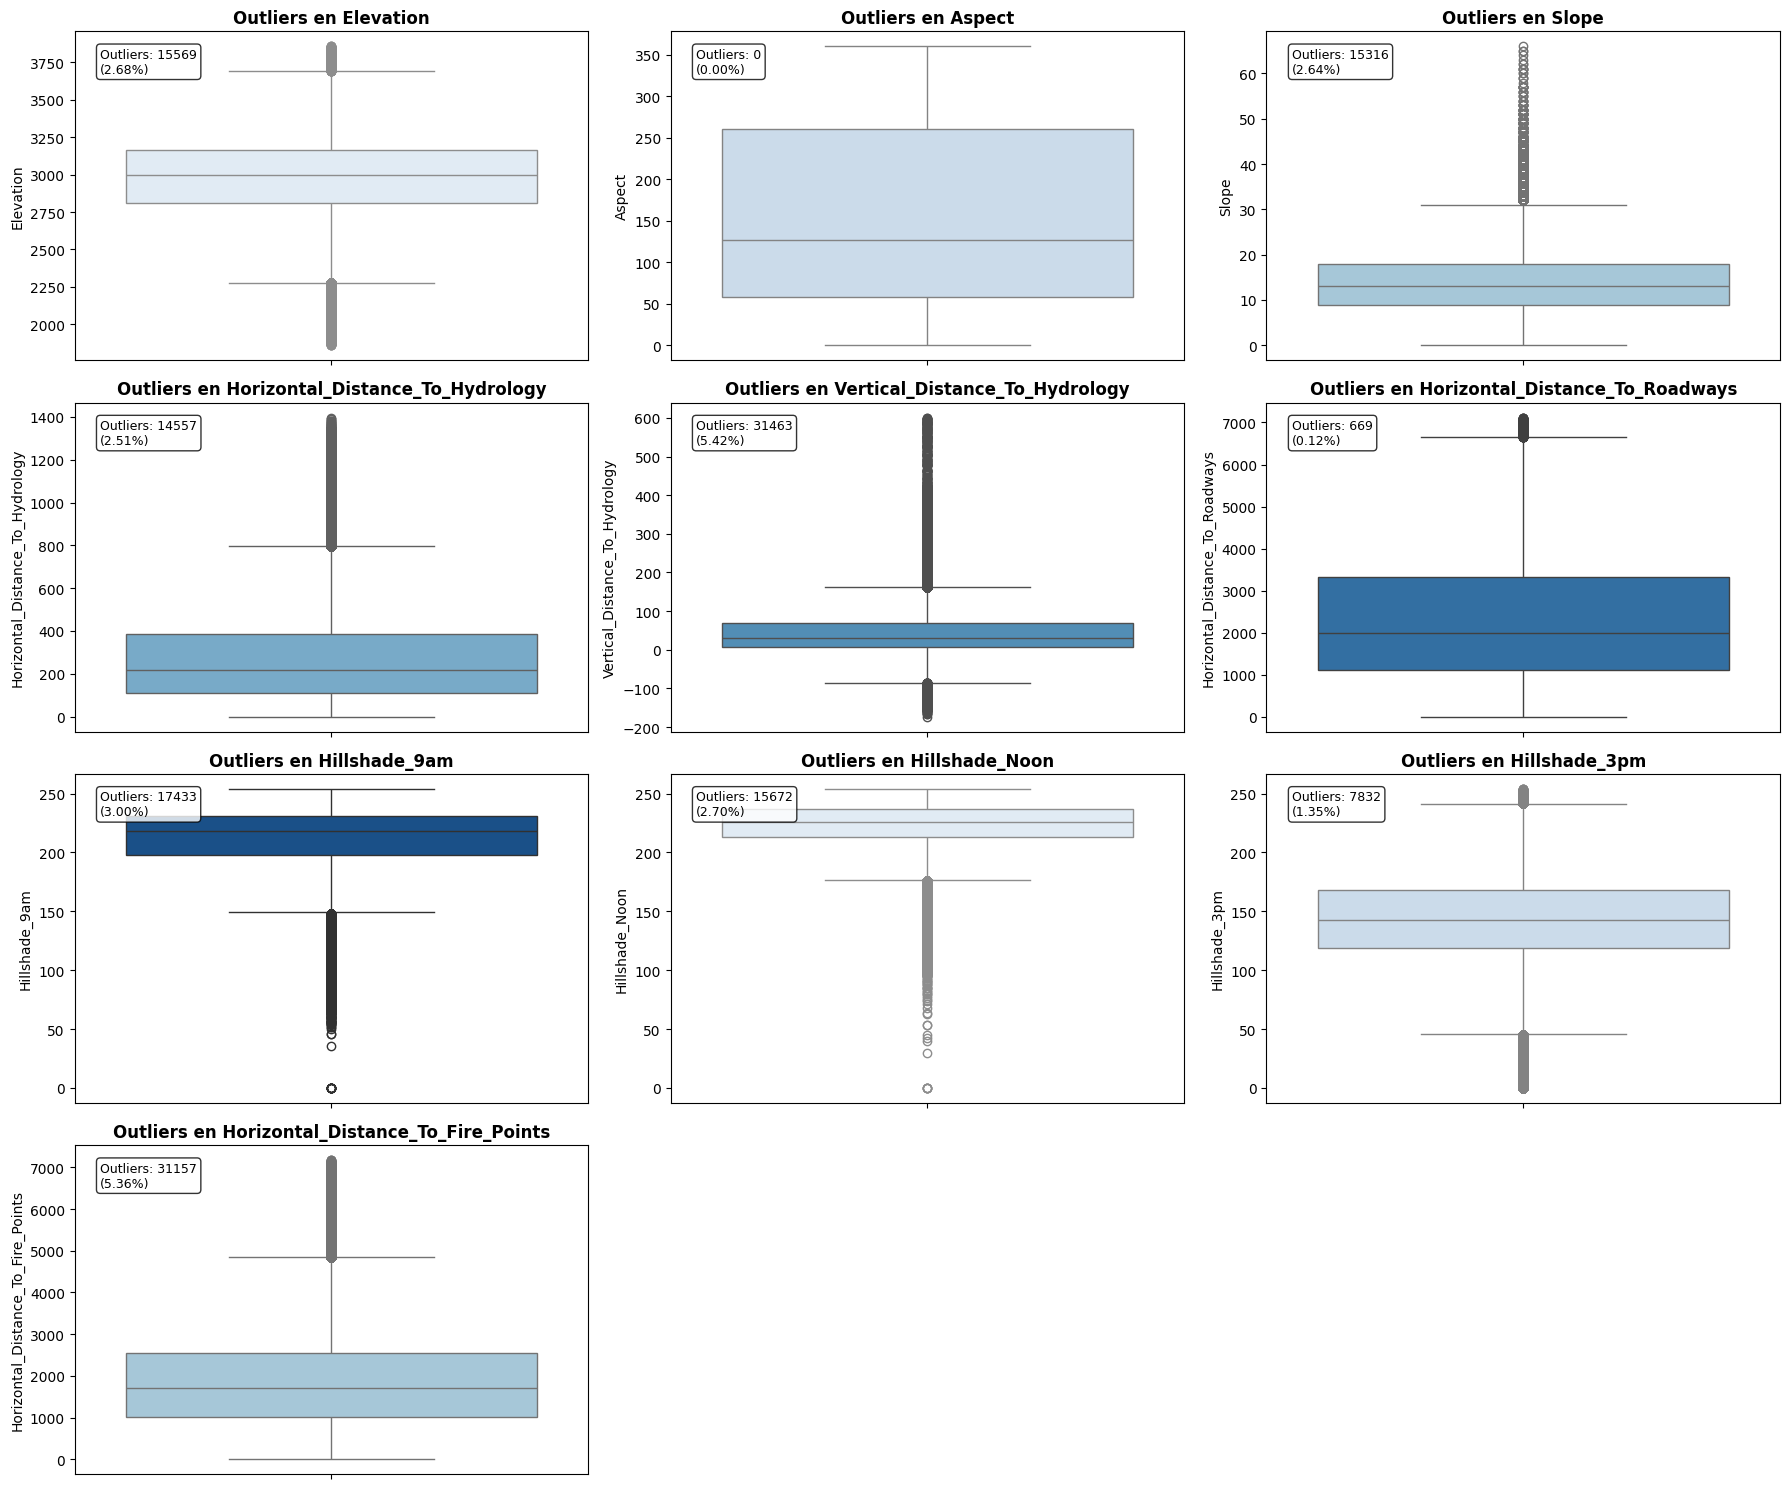

In [26]:
# 9. DETECCIÓN DE OUTLIERS


print("\n DETECCIÓN DE OUTLIERS")


def detect_outliers_iqr(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_analysis = []
for var in continuous_vars:
    n_outliers, lower, upper = detect_outliers_iqr(df, var)
    percentage = (n_outliers / len(df)) * 100
    outlier_analysis.append({
        'Variable': var,
        'Outliers': n_outliers,
        'Porcentaje': f'{percentage:.2f}%',
        'Límite_Inferior': f'{lower:.1f}',
        'Límite_Superior': f'{upper:.1f}'
    })

outlier_df = pd.DataFrame(outlier_analysis)
print(outlier_df.to_string(index=False))

# Visualización de outliers
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    if i < len(axes):
        sns.boxplot(data=df, y=var, ax=axes[i], color=PALETTE[i % len(PALETTE)])
        axes[i].set_title(f'Outliers en {var}', fontweight='bold')
        n_outliers = outlier_analysis[i]['Outliers']
        axes[i].text(0.05, 0.95, f'Outliers: {n_outliers}\n({outlier_analysis[i]["Porcentaje"]})', 
                    transform=axes[i].transAxes, fontsize=9, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ocultar ejes no utilizados
for i in range(len(continuous_vars), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()



 ANÁLISIS ESPACIAL Y GEOGRÁFICO


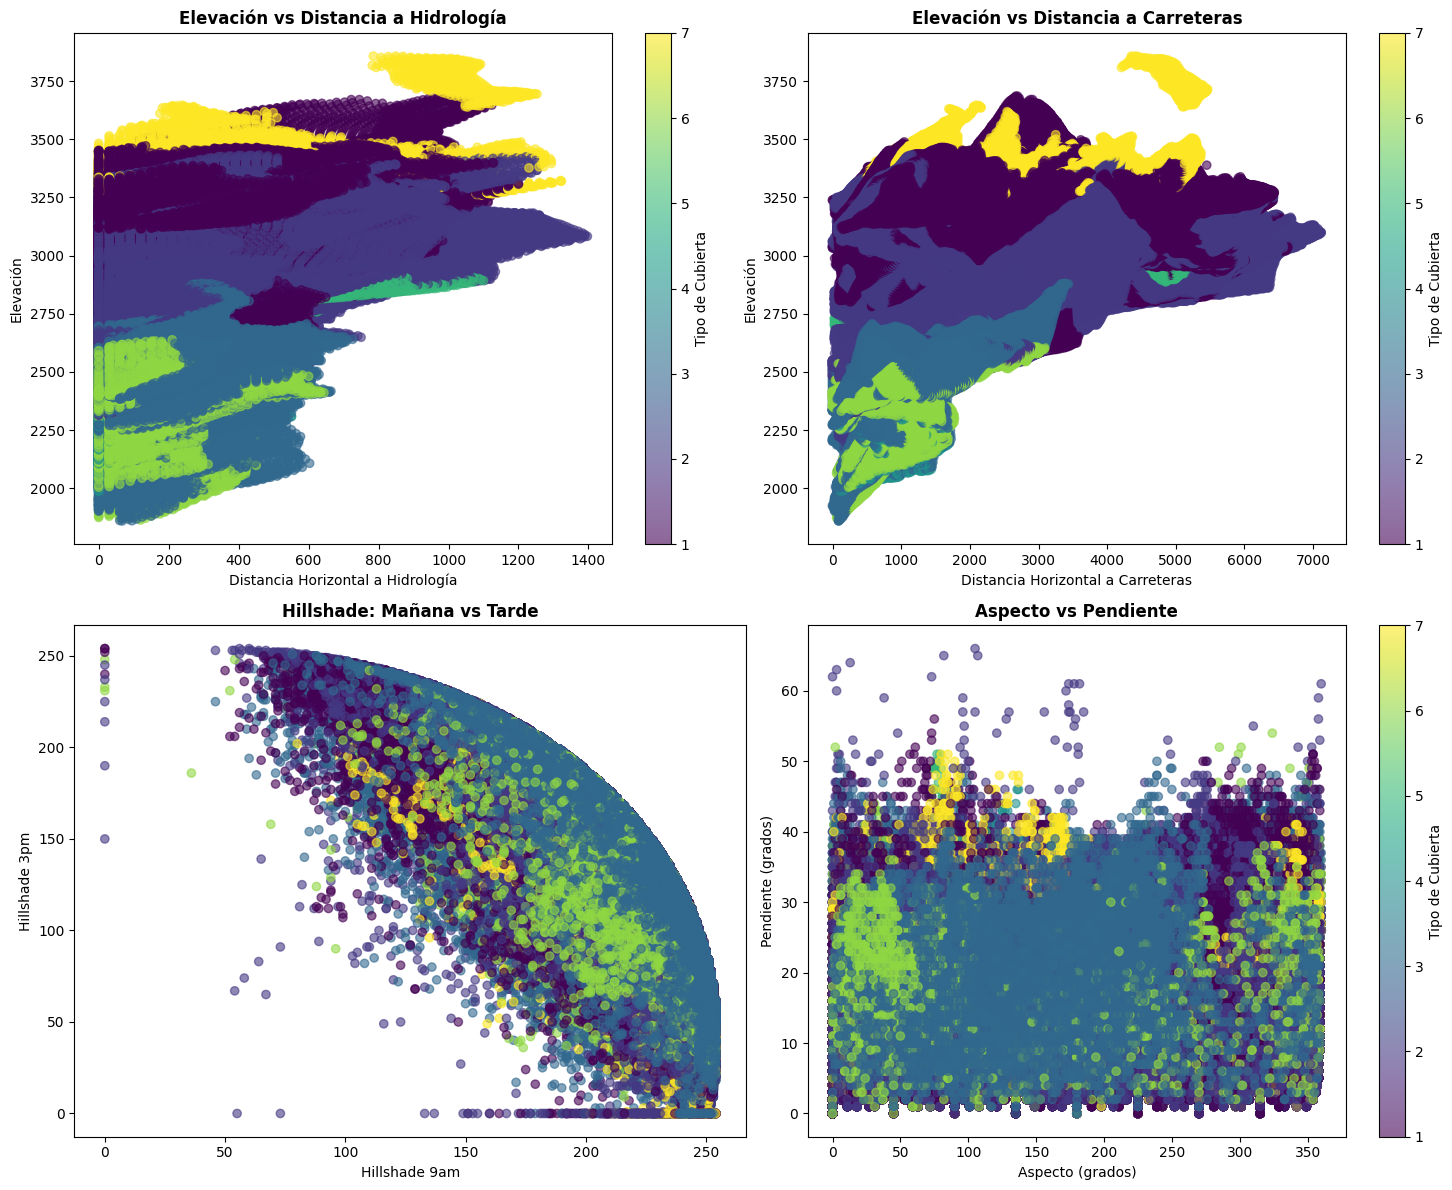

In [27]:
# 10. ANÁLISIS ESPACIAL Y GEOGRÁFICO
print("\n ANÁLISIS ESPACIAL Y GEOGRÁFICO")


# Relaciones espaciales clave
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Elevación vs Distancia a Hidrología
scatter1 = axes[0,0].scatter(df['Horizontal_Distance_To_Hydrology'], df['Elevation'], 
                            c=df['Cover_Type'], cmap='viridis', alpha=0.6)
axes[0,0].set_xlabel('Distancia Horizontal a Hidrología')
axes[0,0].set_ylabel('Elevación')
axes[0,0].set_title('Elevación vs Distancia a Hidrología', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0,0], label='Tipo de Cubierta')

# Elevación vs Distancia a Carreteras
scatter2 = axes[0,1].scatter(df['Horizontal_Distance_To_Roadways'], df['Elevation'], 
                            c=df['Cover_Type'], cmap='viridis', alpha=0.6)
axes[0,1].set_xlabel('Distancia Horizontal a Carreteras')
axes[0,1].set_ylabel('Elevación')
axes[0,1].set_title('Elevación vs Distancia a Carreteras', fontweight='bold')
plt.colorbar(scatter2, ax=axes[0,1], label='Tipo de Cubierta')

# Hillshade a diferentes horas
axes[1,0].scatter(df['Hillshade_9am'], df['Hillshade_3pm'], 
                 c=df['Cover_Type'], cmap='viridis', alpha=0.6)
axes[1,0].set_xlabel('Hillshade 9am')
axes[1,0].set_ylabel('Hillshade 3pm')
axes[1,0].set_title('Hillshade: Mañana vs Tarde', fontweight='bold')

# Aspect vs Slope
scatter4 = axes[1,1].scatter(df['Aspect'], df['Slope'], 
                            c=df['Cover_Type'], cmap='viridis', alpha=0.6)
axes[1,1].set_xlabel('Aspecto (grados)')
axes[1,1].set_ylabel('Pendiente (grados)')
axes[1,1].set_title('Aspecto vs Pendiente', fontweight='bold')
plt.colorbar(scatter4, ax=axes[1,1], label='Tipo de Cubierta')

plt.tight_layout()
plt.show()

In [28]:
# 11. INSIGHTS Y HALLAZGOS CLAVE
print("\n INSIGHTS Y HALLAZGOS CLAVE")

# Métricas generales
total_samples = len(df)
num_features = len(df.columns) - 1
num_classes = df['Cover_Type'].nunique()
class_imbalance = class_distribution.max() / class_distribution.min()

print(f" MÉTRICAS GENERALES:")
print(f"• Total de muestras: {total_samples:,}")
print(f"• Total de características: {num_features}")
print(f"• Clases de cubierta forestal: {num_classes}")
print(f"• Desbalance de clases (ratio): {class_imbalance:.2f}:1")
print(f"• Variables continuas: {len(continuous_vars)}")
print(f"• Variables binarias: {len(wilderness_vars) + len(soil_vars)}")

print(f"\n HALLAZGOS PRINCIPALES:")

# Insight 1: Variable más predictiva
most_predictive = target_corr_df.iloc[0]
print(f"1. {most_predictive['Variable']} es la variable más correlacionada con el target (r: {most_predictive['Correlación_Abs']:.3f})")

# Insight 2: Distribución de clases
most_common_class = class_distribution.idxmax()
least_common_class = class_distribution.idxmin()
print(f"2. Clase más común: {class_descriptions[most_common_class]} ({class_distribution[most_common_class]:,} muestras)")
print(f"   Clase menos común: {class_descriptions[least_common_class]} ({class_distribution[least_common_class]:,} muestras)")

# Insight 3: Outliers
most_outliers_var = outlier_df.loc[outlier_df['Outliers'].astype(str).str.replace('%', '').astype(float).idxmax()]
print(f"3. Variable con más outliers: {most_outliers_var['Variable']} ({most_outliers_var['Outliers']} outliers, {most_outliers_var['Porcentaje']})")

# Insight 4: Correlaciones fuertes
if len(strong_correlations) > 0:
    strongest_corr = max(strong_correlations, key=lambda x: abs(x[2]))
    print(f"4. Correlación más fuerte entre variables: {strongest_corr[0]} ↔ {strongest_corr[1]} (r: {strongest_corr[2]:.3f})")

# Insight 5: Tipos de suelo
print(f"5. Solo {len(soil_frequencies)} de {len(soil_vars)} tipos de suelo están presentes en el dataset")
print(f"   Tipo de suelo más común: {soil_freq_df.iloc[0]['Soil_Type']} ({soil_freq_df.iloc[0]['Porcentaje']:.1f}%)")

print(f"\n RECOMENDACIONES PARA MODELADO:")
print("• EMPLEAR técnicas de ensemble (Random Forest, XGBoost) para capturar relaciones complejas")
print("• CONSIDERAR reducción de dimensionalidad para variables de tipo de suelo (alta cardinalidad)")
print("• IMPLEMENTAR stratified sampling o class weights por desbalance moderado")
print("• PRIORIZAR variables como Elevation en feature engineering")
print("• EVALUAR eliminación o transformación de variables con muchos outliers")
print("• CONSIDERAR técnicas de clustering para patrones espaciales")


 INSIGHTS Y HALLAZGOS CLAVE
 MÉTRICAS GENERALES:
• Total de muestras: 581,012
• Total de características: 54
• Clases de cubierta forestal: 7
• Desbalance de clases (ratio): 103.13:1
• Variables continuas: 10
• Variables binarias: 44

 HALLAZGOS PRINCIPALES:
1. Elevation es la variable más correlacionada con el target (r: 0.270)
2. Clase más común: Lodgepole Pine (283,301 muestras)
   Clase menos común: Cottonwood/Willow (2,747 muestras)
3. Variable con más outliers: Vertical_Distance_To_Hydrology (31463 outliers, 5.42%)
4. Correlación más fuerte entre variables: Hillshade_9am ↔ Hillshade_3pm (r: -0.780)
5. Solo 40 de 40 tipos de suelo están presentes en el dataset
   Tipo de suelo más común: Soil_Type29 (19.8%)

 RECOMENDACIONES PARA MODELADO:
• EMPLEAR técnicas de ensemble (Random Forest, XGBoost) para capturar relaciones complejas
• CONSIDERAR reducción de dimensionalidad para variables de tipo de suelo (alta cardinalidad)
• IMPLEMENTAR stratified sampling o class weights por desba


 RESUMEN EJECUTIVO


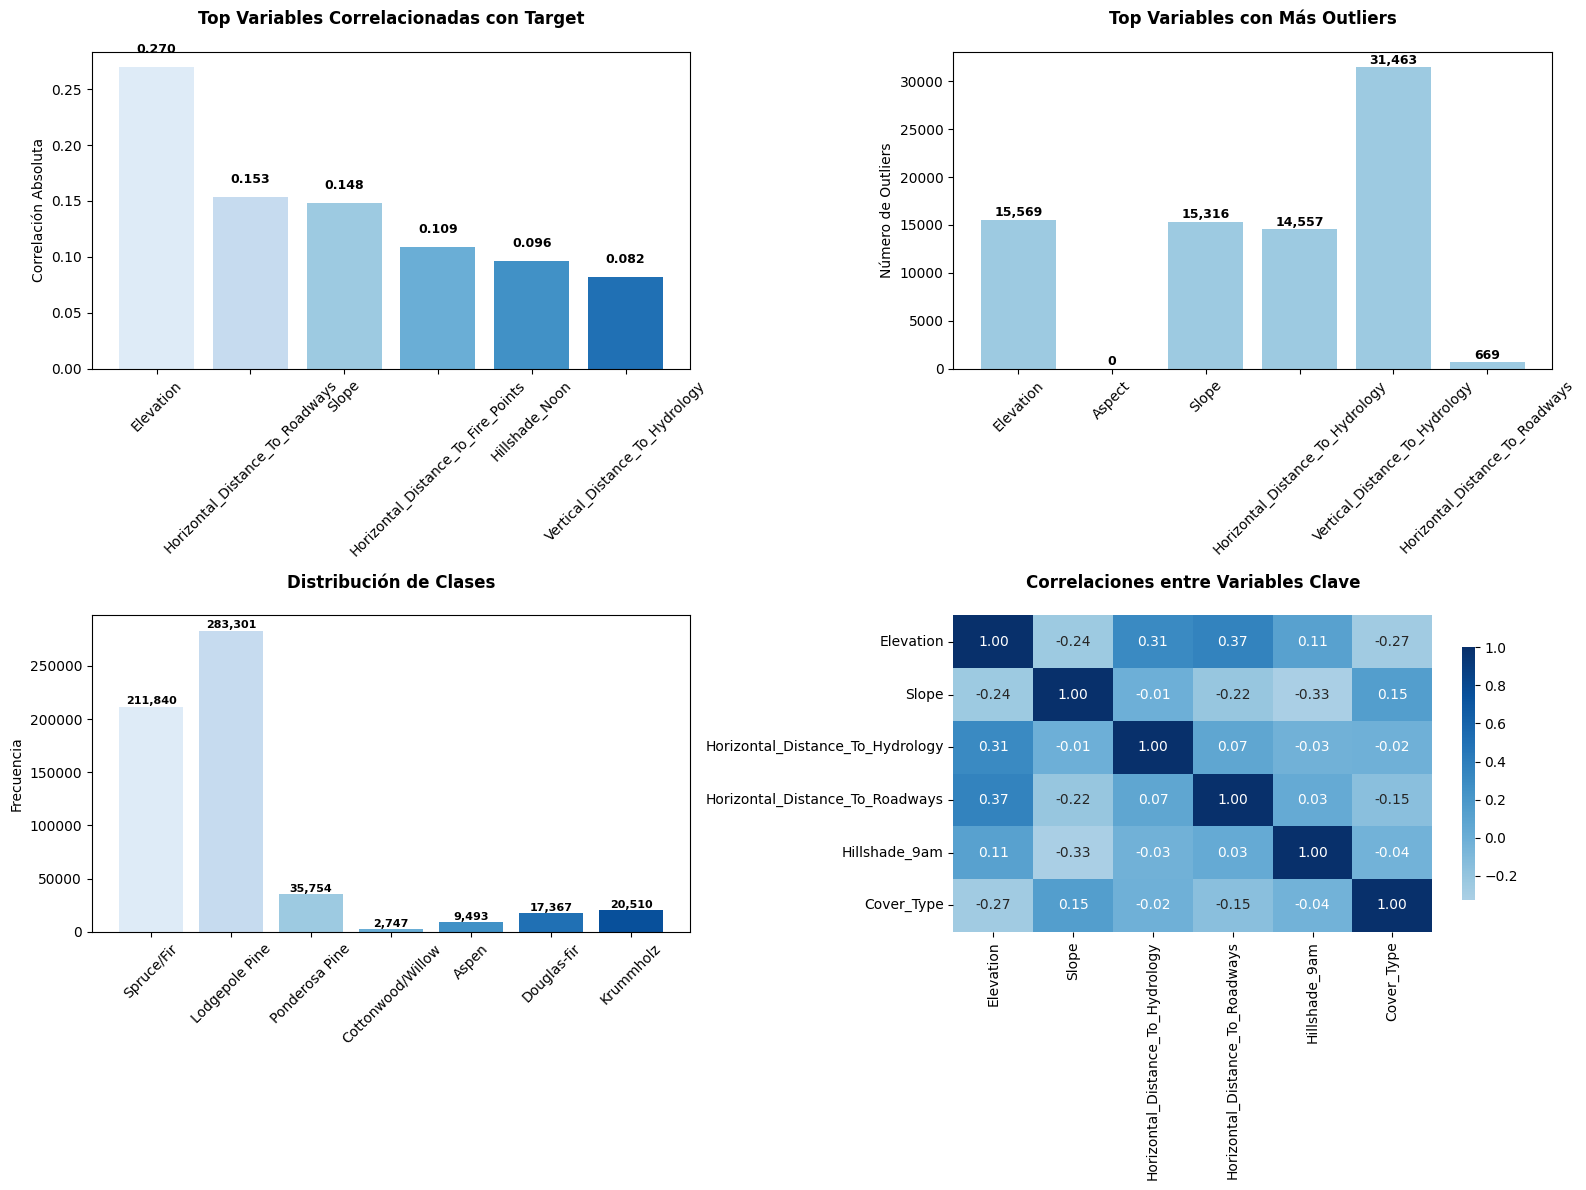

In [29]:
# 12.  RESUMEN EJECUTIVO
print("\n RESUMEN EJECUTIVO")


# Crear dashboard visual
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Top variables correlacionadas con target
top_corr_vars = target_corr_df.head(6)
bars = axes[0,0].bar(top_corr_vars['Variable'], top_corr_vars['Correlación_Abs'], 
                    color=PALETTE[:len(top_corr_vars)])
axes[0,0].set_title('Top Variables Correlacionadas con Target', fontweight='bold', pad=20)
axes[0,0].set_ylabel('Correlación Absoluta')
axes[0,0].tick_params(axis='x', rotation=45)
for bar, value in zip(bars, top_corr_vars['Correlación_Abs']):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                  f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 2: Distribución de outliers
outlier_counts = [int(x['Outliers']) for x in outlier_analysis[:6]]
outlier_vars = [x['Variable'] for x in outlier_analysis[:6]]
bars = axes[0,1].bar(outlier_vars, outlier_counts, color=PALETTE[2])
axes[0,1].set_title('Top Variables con Más Outliers', fontweight='bold', pad=20)
axes[0,1].set_ylabel('Número de Outliers')
axes[0,1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars, outlier_counts):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                  f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 3: Balance de clases
class_names = [class_descriptions[i] for i in class_distribution.index]
bars = axes[1,0].bar(class_names, class_distribution.values, color=PALETTE)
axes[1,0].set_title('Distribución de Clases', fontweight='bold', pad=20)
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars, class_distribution.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                  f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Gráfico 4: Mapa de calor de correlaciones reducido
key_vars_corr = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Cover_Type']
sns.heatmap(df[key_vars_corr].corr(), annot=True, cmap='Blues', center=0, 
            fmt='.2f', ax=axes[1,1], cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Correlaciones entre Variables Clave', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


In [30]:
# CONCLUSIÓN EJECUTIVA

print("""

MÉTRICAS GENERALES

Estas son estadísticas básicas sobre la estructura del dataset:

Total de muestras: 581,012
  - Hay más de medio millón de registros (datos individuales).

Total de características: 54
  - Cada muestra tiene 54 columnas o atributos (features), que podrían ser usadas para predecir la clase de cubierta forestal.

Clases de cubierta forestal: 7
  - El objetivo (target) es una variable categórica con 7 posibles clases (tipos de bosque).

Desbalance de clases (ratio): 103.13:1
  - Hay un fuerte desbalance: la clase más común es más de 100 veces más frecuente que la menos común.

Variables continuas: 10
  - 10 variables tienen valores numéricos continuos (por ejemplo, elevación, distancias, sombras, etc.)

Variables binarias: 44
  - 44 variables son binarias (0 o 1), codificaciones de tipo de suelo o áreas de cobertura.

 HALLAZGOS PRINCIPALES

Estas observaciones destacan relaciones interesantes o problemas a tener en cuenta:

1. La variable más correlacionada con el target es Elevation (r: 0.270):
   - Aunque no es una correlación alta, Elevation es la que más se relaciona con el tipo de bosque. Puede ser clave en la predicción.

2. Clase más común: Lodgepole Pine (283,301 muestras)
   Clase menos común: Cottonwood/Willow (2,747 muestras)
   - Este es el origen del desbalance mencionado antes. Puede dificultar que el modelo aprenda bien las clases minoritarias.

3. Variable con más outliers: Vertical_Distance_To_Hydrology (31,463 outliers, 5.42%)
   - Esta variable tiene valores atípicos que pueden afectar negativamente al modelo si no se tratan.

4. Correlación más fuerte entre variables: Hillshade_9am y Hillshade_3pm (r: -0.780)
   - Estas dos variables están fuertemente correlacionadas, pero en sentido inverso. Quizá una de ellas podría eliminarse o combinarse.

5. 40 de 40 tipos de suelo presentes en el dataset; el más común es Soil_Type29 (19.8%)
   - El dataset incluye todos los tipos de suelo posibles, pero algunos son mucho más frecuentes que otros.

 RECOMENDACIONES PARA MODELADO

Sugerencias prácticas para construir un modelo más robusto:

Usar técnicas de ensemble (Random Forest, XGBoost, etc...):
  - Estos algoritmos pueden capturar relaciones complejas y no lineales mejor que los modelos simples.

Reducir dimensionalidad en variables de tipo de suelo:
  - Como hay 40 variables binarias para tipo de suelo, puede haber redundancia. Se podría aplicar PCA o agrupar suelos similares.

Usar muestreo estratificado o pesos por clase:
  - Ayuda a mitigar el impacto del desbalance en el entrenamiento del modelo.

Dar prioridad a Elevation y otras variables importantes en el feature engineering:
  - Incluir interacciones, normalizaciones u otras transformaciones útiles sobre estas variables clave.

Transformar o eliminar variables con muchos outliers:
  - Por ejemplo, aplicar logaritmos, winsorización, o eliminar outliers extremos.



""")



MÉTRICAS GENERALES

Estas son estadísticas básicas sobre la estructura del dataset:

Total de muestras: 581,012
  - Hay más de medio millón de registros (datos individuales).

Total de características: 54
  - Cada muestra tiene 54 columnas o atributos (features), que podrían ser usadas para predecir la clase de cubierta forestal.

Clases de cubierta forestal: 7
  - El objetivo (target) es una variable categórica con 7 posibles clases (tipos de bosque).

Desbalance de clases (ratio): 103.13:1
  - Hay un fuerte desbalance: la clase más común es más de 100 veces más frecuente que la menos común.

Variables continuas: 10
  - 10 variables tienen valores numéricos continuos (por ejemplo, elevación, distancias, sombras, etc.)

Variables binarias: 44
  - 44 variables son binarias (0 o 1), codificaciones de tipo de suelo o áreas de cobertura.

 HALLAZGOS PRINCIPALES

Estas observaciones destacan relaciones interesantes o problemas a tener en cuenta:

1. La variable más correlacionada con el t